#1. Causal Discovery 연습

- PC VS FCI
 - 특징: 조건부 독립성을 이용해 엣지 방향성을 지정.
 - PC : 빠르지만 숨은 변수가 없다는 가정
 - FCI(Fast Causal Inference): 잠재 변수와 선택 편향이 존재할 때도 robust, 다양한 실제 환경을 반영한 복잡한 인과 구조 모델링 가능, 숨은 변수(latent confounders)와 선택 편향(selection bias)까지 허용, Partial Ancestral Graph (PAG)

In [25]:
!pip install causal-learn

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from causallearn.search.ConstraintBased.PC import pc
from causallearn.search.ConstraintBased.FCI import fci
from causallearn.utils.GraphUtils import GraphUtils


Sample Pandas DataFrame Data (first 5 rows):
          X0         X1        X2        X3        X4
0  3.745401  13.366043  3.475270  0.888505  6.800729
1  9.507143  19.259397  5.659753 -6.676722  2.319429
2  7.319939  16.241376  7.115428  1.900989  3.374287
3  5.986585  12.775557  0.774126  3.052929  1.372684
4  1.560186   6.954965  2.668943  2.798952  4.275460

Running PC algorithm with NumPy data...


  0%|          | 0/5 [00:00<?, ?it/s]

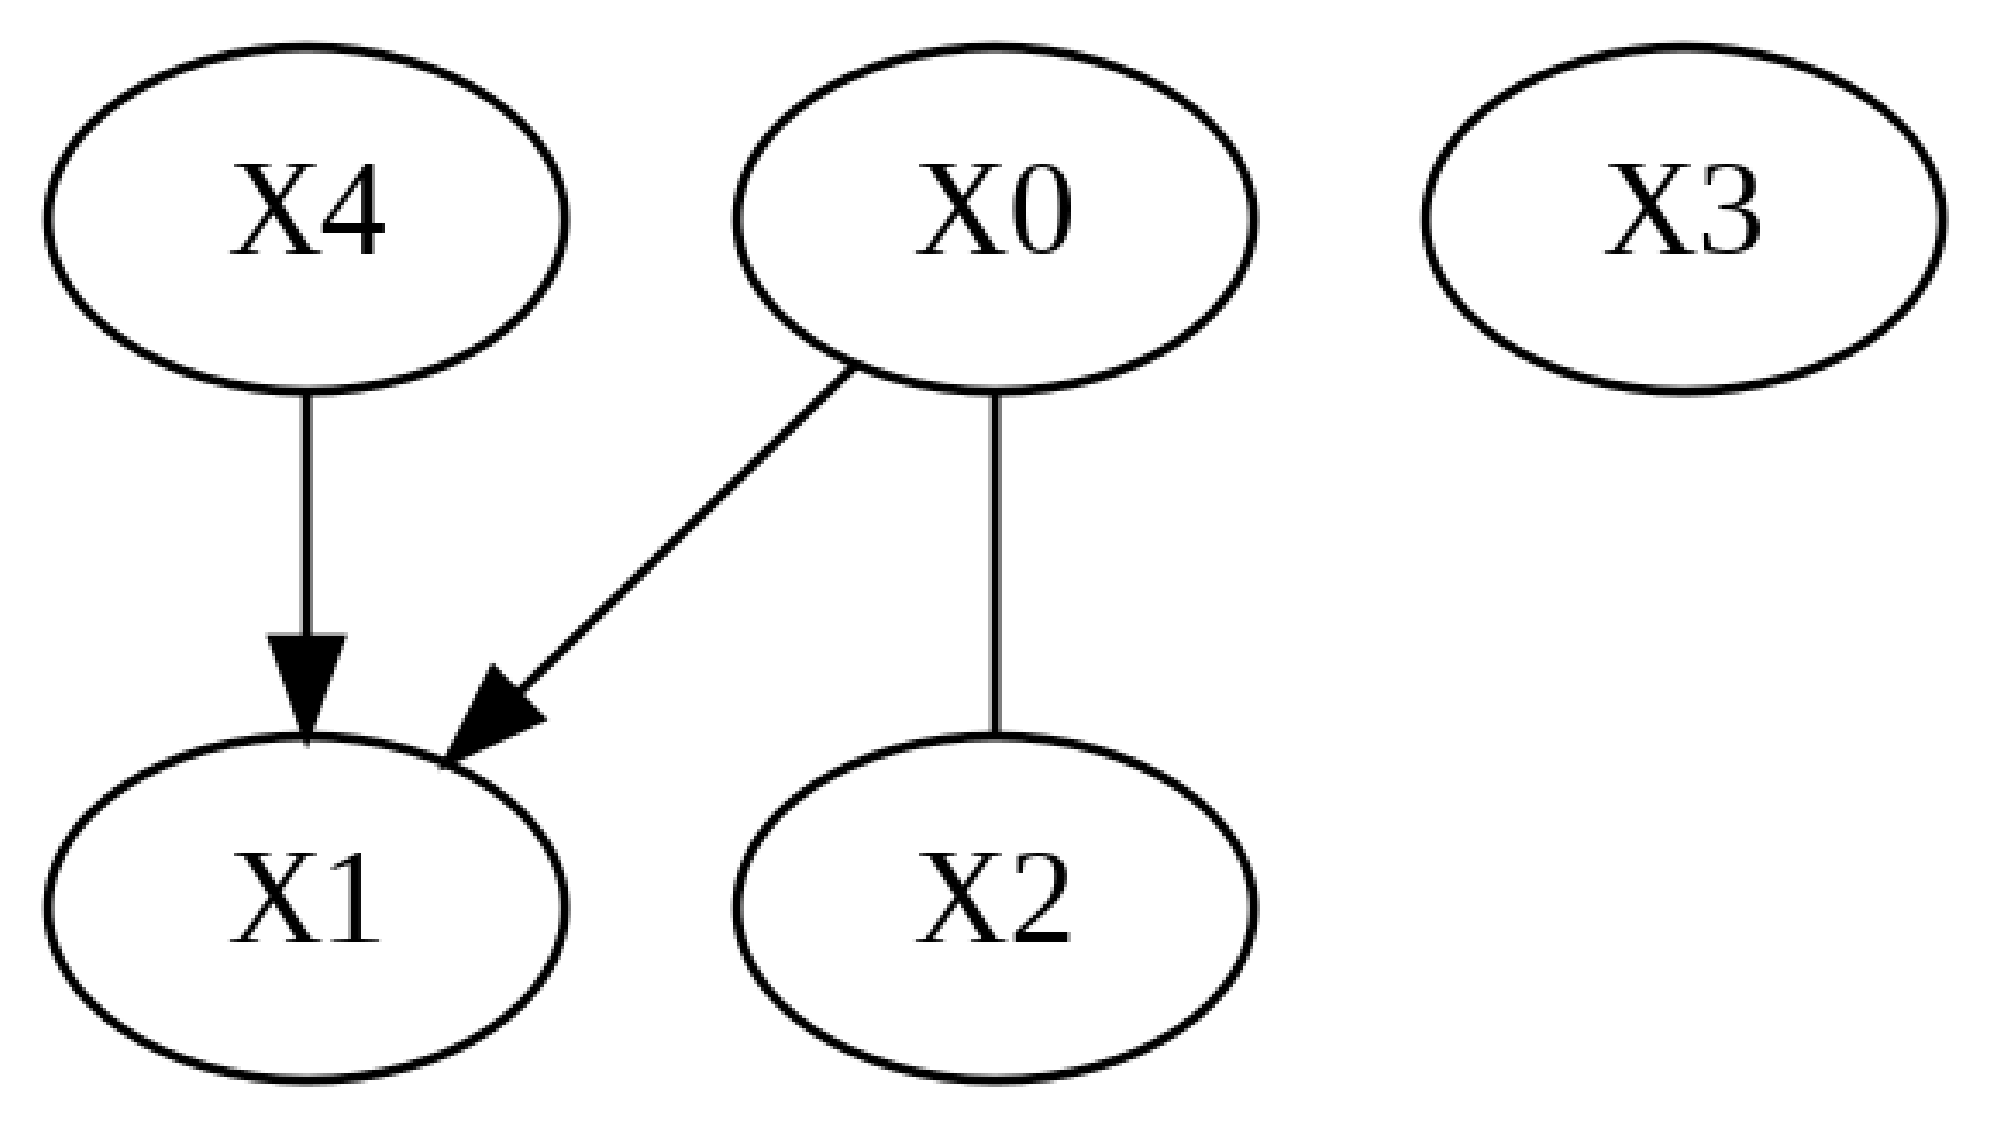

In [27]:
np.random.seed(42) # for reproducibility

num_samples = 1000

X0 = np.random.rand(num_samples) * 10
X3 = np.random.randn(num_samples) * 5
X4 = np.random.rand(num_samples) * 7

X1 = 2 * X0 + 0.5 * X4 + np.random.randn(num_samples) * 2
X2 = X0 / 2 + np.random.randn(num_samples) * 1.5

data = pd.DataFrame(np.column_stack([X0, X1, X2, X3, X4]), columns=['X0', 'X1', 'X2', 'X3', 'X4'])
print("\nSample Pandas DataFrame Data (first 5 rows):\n", data.head())

# --- Example Usage with the generated data ---

print("\nRunning PC algorithm with NumPy data...")
cg = pc(data.to_numpy())
pyd_np = GraphUtils.to_pydot(cg.G)
#pyd_np.write_png('simple_test_np.png')

cg.draw_pydot_graph(labels=['X0', 'X1', 'X2', 'X3', 'X4'])


In [28]:
# or customized parameters
g, edge = fci(data.to_numpy())

# visualization
from causallearn.utils.GraphUtils import GraphUtils

pdy = GraphUtils.to_pydot(g)
pdy.write_png('simple_test.png')
print(pdy)

  0%|          | 0/5 [00:00<?, ?it/s]

digraph {
fontsize=18;
dpi=200;
0 [label=X1];
0 [label=X1];
1 [label=X2];
1 [label=X2];
2 [label=X3];
2 [label=X3];
3 [label=X4];
3 [label=X4];
4 [label=X5];
4 [label=X5];
0 -> 1 [dir=both, arrowtail=none, arrowhead=normal];
0 -> 2 [dir=both, arrowtail=odot, arrowhead=odot];
4 -> 1 [dir=both, arrowtail=odot, arrowhead=normal];
}



- 제조 데이터 적용

In [29]:
import pandas as pd
data = pd.read_csv("data.csv")
data.head()

,X20,X86,X87,X88,X113,X115,X116,X117,X119,X120,...,X527,X570,X571,X572,X573,X574,X575,X576,X577,Pass.Fail
0,1.4026,2.3895,0.9690,1747.6049,0.9460,748.6115,0.9908,58.4306,0.9804,6.3788,...,6.6926,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,0
1,1.3825,2.3754,0.9894,1931.6464,0.9425,731.2517,0.9902,58.6680,0.9731,6.5061,...,8.8370,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0
2,1.4123,2.4532,0.9880,1685.8514,0.9231,718.5777,0.9899,58.4808,0.9772,6.4527,...,6.4568,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,1
3,1.4011,2.4004,0.9904,1752.0968,0.9564,709.0867,0.9906,58.6635,0.9761,6.4935,...,6.4865,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0
4,1.3888,2.4530,0.9902,1828.3846,0.9424,796.5950,0.9908,58.3858,0.9628,6.3551,...,6.3745,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,0


In [30]:
cols = data.columns.tolist()

  0%|          | 0/49 [00:00<?, ?it/s]

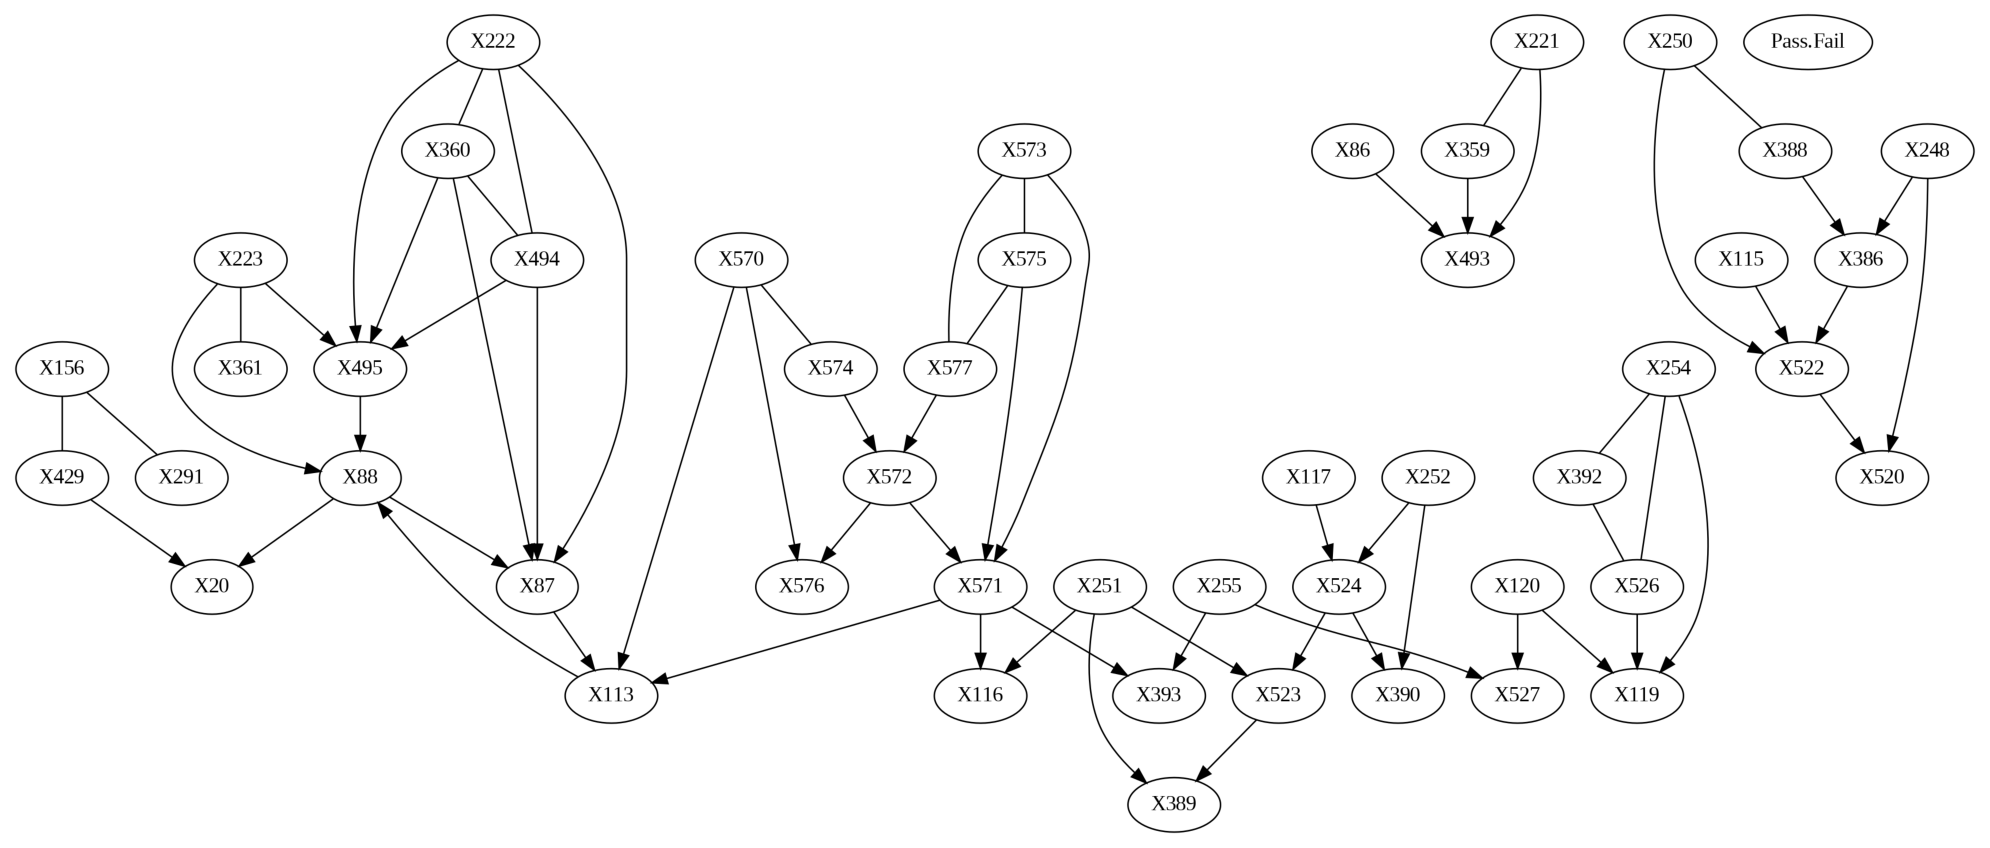

In [31]:
#PC 적
cg = pc(data.to_numpy())
pyd_np = GraphUtils.to_pydot(cg.G)
#pyd_np.write_png('simple_test_np.png')

cg.draw_pydot_graph(labels=cols)

In [32]:
# FCI 적용
g, edge = fci(data.values)

# visualization
from causallearn.utils.GraphUtils import GraphUtils

pdy = GraphUtils.to_pydot(g)
pdy.write_png('simple_test.png')
print(pdy)

  0%|          | 0/49 [00:00<?, ?it/s]

X25 --> X36
X37 --> X27
X43 --> X47
digraph {
fontsize=18;
dpi=200;
0 [label=X1];
0 [label=X1];
1 [label=X2];
1 [label=X2];
2 [label=X3];
2 [label=X3];
3 [label=X4];
3 [label=X4];
4 [label=X5];
4 [label=X5];
5 [label=X6];
5 [label=X6];
6 [label=X7];
6 [label=X7];
7 [label=X8];
7 [label=X8];
8 [label=X9];
8 [label=X9];
9 [label=X10];
9 [label=X10];
10 [label=X11];
10 [label=X11];
11 [label=X12];
11 [label=X12];
12 [label=X13];
12 [label=X13];
13 [label=X14];
13 [label=X14];
14 [label=X15];
14 [label=X15];
15 [label=X16];
15 [label=X16];
16 [label=X17];
16 [label=X17];
17 [label=X18];
17 [label=X18];
18 [label=X19];
18 [label=X19];
19 [label=X20];
19 [label=X20];
20 [label=X21];
20 [label=X21];
21 [label=X22];
21 [label=X22];
22 [label=X23];
22 [label=X23];
23 [label=X24];
23 [label=X24];
24 [label=X25];
24 [label=X25];
25 [label=X26];
25 [label=X26];
26 [label=X27];
26 [label=X27];
27 [label=X28];
27 [label=X28];
28 [label=X29];
28 [label=X29];
29 [label=X30];
29 [label=X30];
30 [label=

- LiNGAM적용

In [33]:
!pip install lingam

In [34]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import make_dot

np.set_printoptions(precision=3, suppress=True)
np.random.seed(100)

In [35]:
import pandas as pd
data = pd.read_csv("data.csv")
data.head()

,X20,X86,X87,X88,X113,X115,X116,X117,X119,X120,...,X527,X570,X571,X572,X573,X574,X575,X576,X577,Pass.Fail
0,1.4026,2.3895,0.9690,1747.6049,0.9460,748.6115,0.9908,58.4306,0.9804,6.3788,...,6.6926,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,0
1,1.3825,2.3754,0.9894,1931.6464,0.9425,731.2517,0.9902,58.6680,0.9731,6.5061,...,8.8370,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0
2,1.4123,2.4532,0.9880,1685.8514,0.9231,718.5777,0.9899,58.4808,0.9772,6.4527,...,6.4568,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,1
3,1.4011,2.4004,0.9904,1752.0968,0.9564,709.0867,0.9906,58.6635,0.9761,6.4935,...,6.4865,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0
4,1.3888,2.4530,0.9902,1828.3846,0.9424,796.5950,0.9908,58.3858,0.9628,6.3551,...,6.3745,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,0


In [ ]:
data1 = data[data["Pass.Fail"]==1].drop(columns=["Pass.Fail"])
cols = data1.describe().iloc[2,:].sort_values(ascending=False)[0:20].index.tolist()

In [ ]:
model = lingam.DirectLiNGAM()
model.fit(data1[cols])  #불량에서의 인과

In [ ]:
model.adjacency_matrix_

array([[ 0.   ,  0.   ,  0.   ,  0.   ,  0.   , -1.349,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.318,  0.   ,
         0.   ,  1.359,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  1.072,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
   

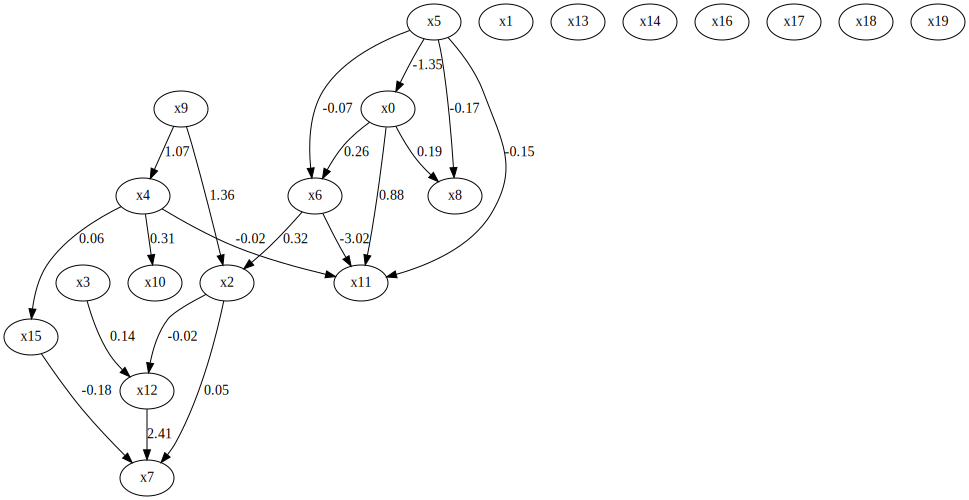

In [ ]:
make_dot(model.adjacency_matrix_)

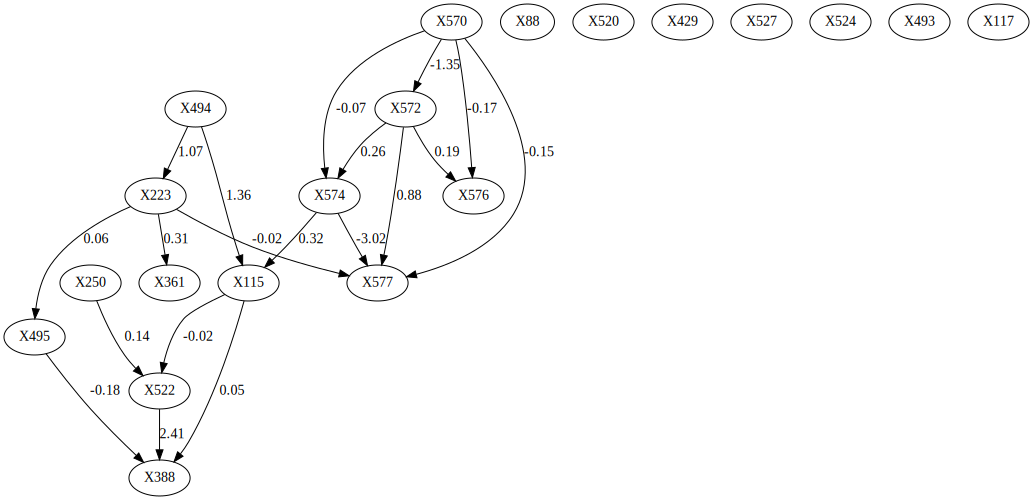

In [ ]:
make_dot(model.adjacency_matrix_, labels=cols)

In [ ]:
model.causal_order_

[5, 0, 9, 4, 13, 3, 6, 11, 10, 1, 2, 12, 19, 18, 16, 14, 15, 7, 17, 8]

In [ ]:
model.estimate_total_effect(data, 0, 2)

0.04351821156537001

#2.Meta-Learner 활용

In [36]:
!pip install xgboost causalml lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 2.5 MB/s eta 0:00:00


In [37]:
# 코랩 사용시 실행 후 -> 런타임 -> 세션 다시시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (6,991 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126308 files and dire

## 1) 라이브러리 및 데이터 부르기

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import platform

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    plt.rc('font', family='NanumBarunGothic')
else:
    plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

In [39]:
from causalml.inference.meta import BaseTClassifier
from causalml.metrics import plot_gain, plot_qini
from causalml.metrics import auuc_score, qini_score

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

import warnings

In [40]:
import pandas as pd
import numpy as np
df = pd.read_csv("pm_train.csv", index_col=[0])
df.head()
#df.cycle.value_counts() 1~100

df["trmt1"] = df.setting1.apply( lambda x: x>0)
df.trmt1.value_counts()

df["trmt2"] = df.setting2.apply( lambda x: x>0)
df.trmt2.value_counts()

df["target"] = df.ttf.apply(lambda x: x<30)
df.target.value_counts()

,count
target,
False,17631
True,3000


## 2) 변수 선정

- 처치 변수: settings1, settings2에서 파생된 trmt1, trmt2

- target: ttf <30 또는 ttf>=30

- 교란변수: s1....변수들

In [41]:
confounding_col = ['s1', 's2', 's3',
       's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
       's15', 's16', 's17', 's18', 's19', 's20', 's21']


- 결측치 제거

In [42]:
df = df.replace(' ', np.nan).dropna()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20631 entries, 0 to 20630
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        20631 non-null  int64  
 1   cycle     20631 non-null  int64  
 2   setting1  20631 non-null  float64
 3   setting2  20631 non-null  float64
 4   setting3  20631 non-null  float64
 5   s1        20631 non-null  float64
 6   s2        20631 non-null  float64
 7   s3        20631 non-null  float64
 8   s4        20631 non-null  float64
 9   s5        20631 non-null  float64
 10  s6        20631 non-null  float64
 11  s7        20631 non-null  float64
 12  s8        20631 non-null  float64
 13  s9        20631 non-null  float64
 14  s10       20631 non-null  float64
 15  s11       20631 non-null  float64
 16  s12       20631 non-null  float64
 17  s13       20631 non-null  float64
 18  s14       20631 non-null  float64
 19  s15       20631 non-null  float64
 20  s16       20631 non-null  float64

In [44]:
for i in ["target", "trmt1","trmt2"]:
    df[i] = df[i].astype(int)

## 3) EDA

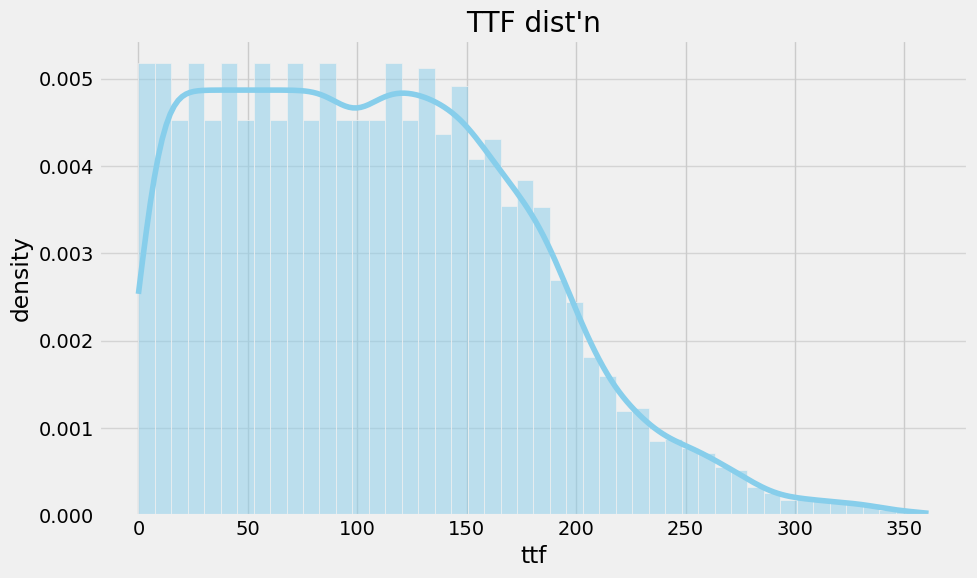

In [46]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['ttf'].astype(int).replace(99,np.nan).dropna(), color='skyblue', label='TTF', kde=True, stat='density', alpha=0.5)
plt.title('TTF dist\'n')
plt.xlabel('ttf')
plt.ylabel('density')
plt.grid(axis='y', alpha=0.75)
plt.show()

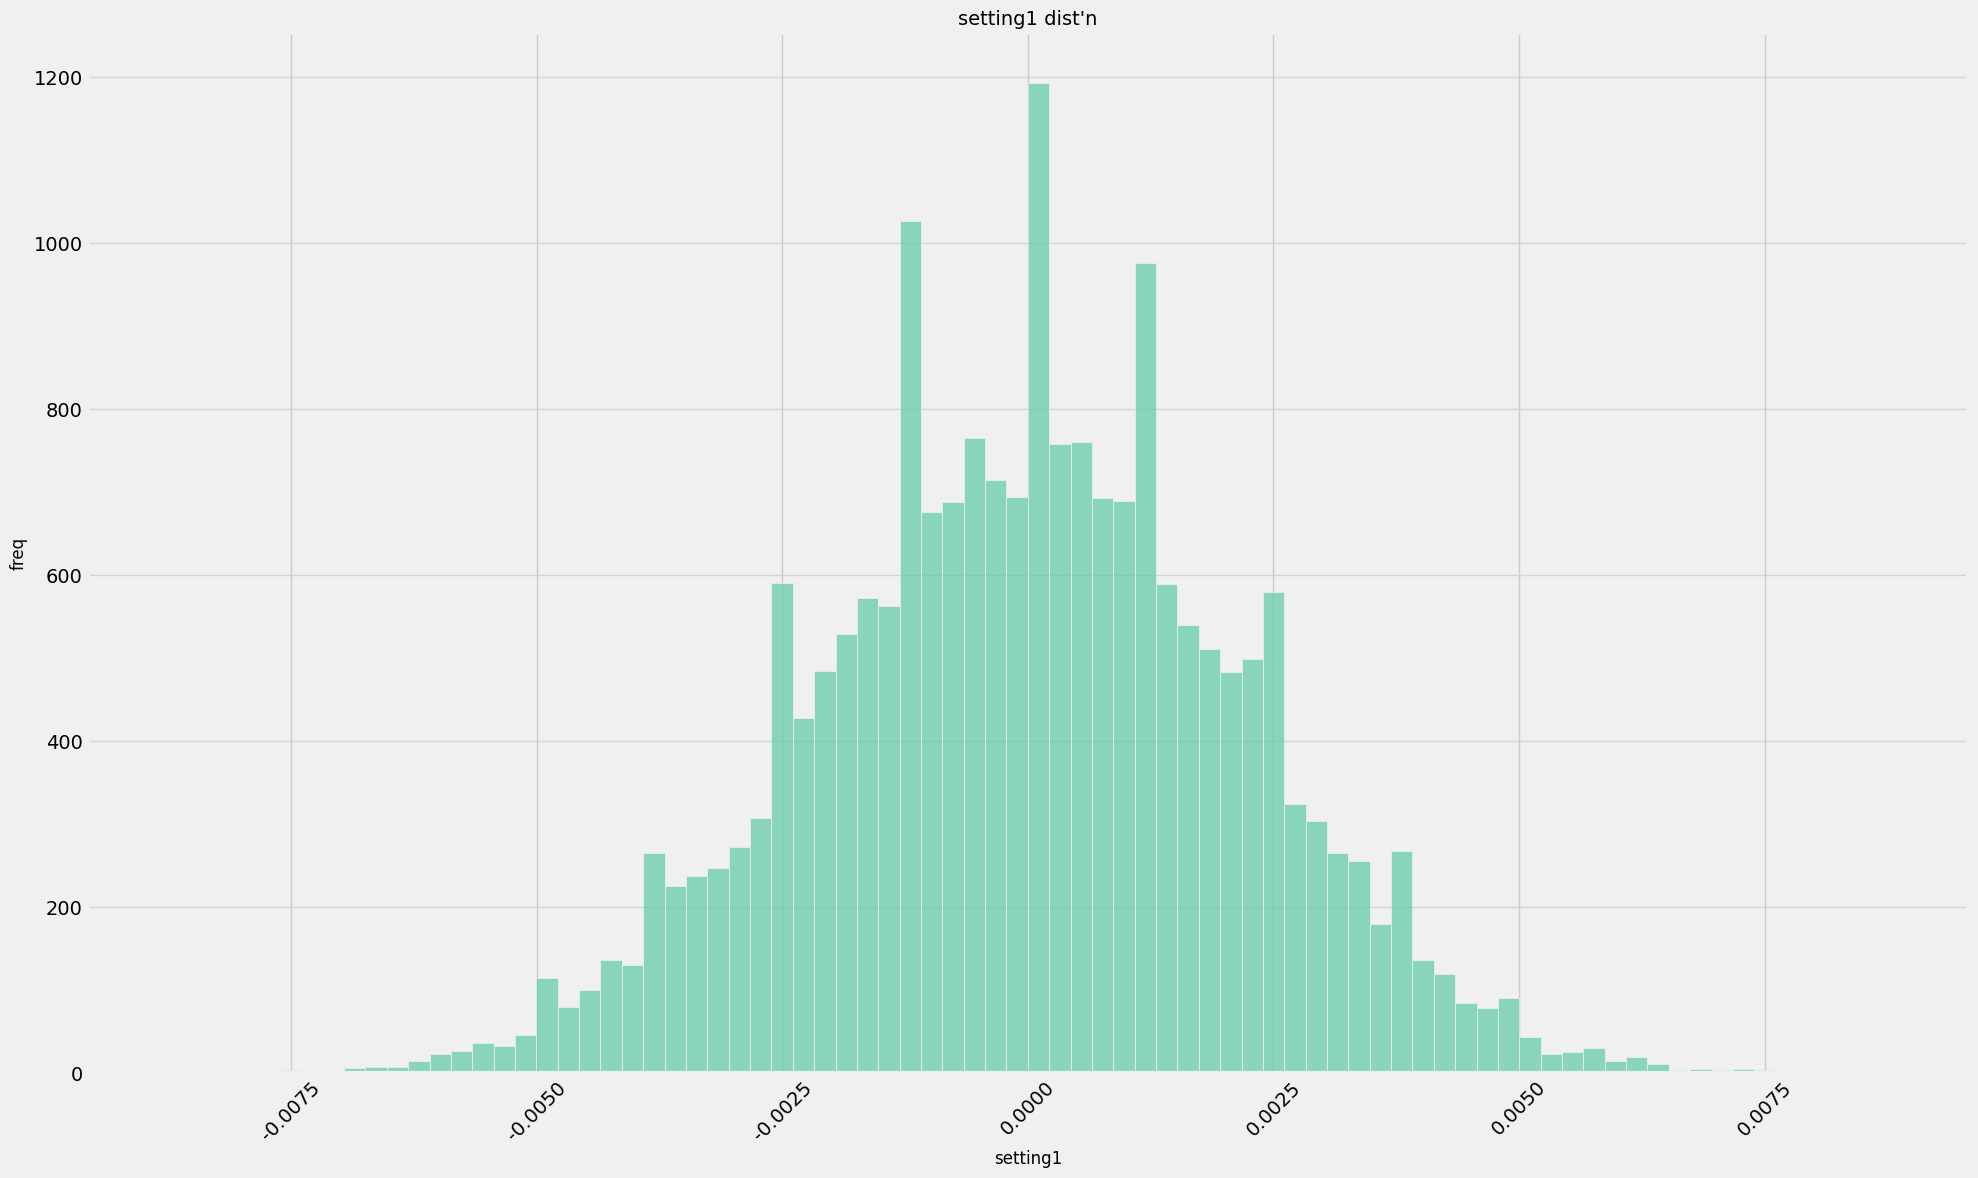

In [48]:
sns.histplot(df['setting1'],
                 color='mediumaquamarine',
                 stat='count',
                 bins='auto'
                 )

plt.title(f'setting1 dist\'n', fontsize=14)
plt.xlabel('setting1', fontsize=12)
plt.ylabel('freq', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

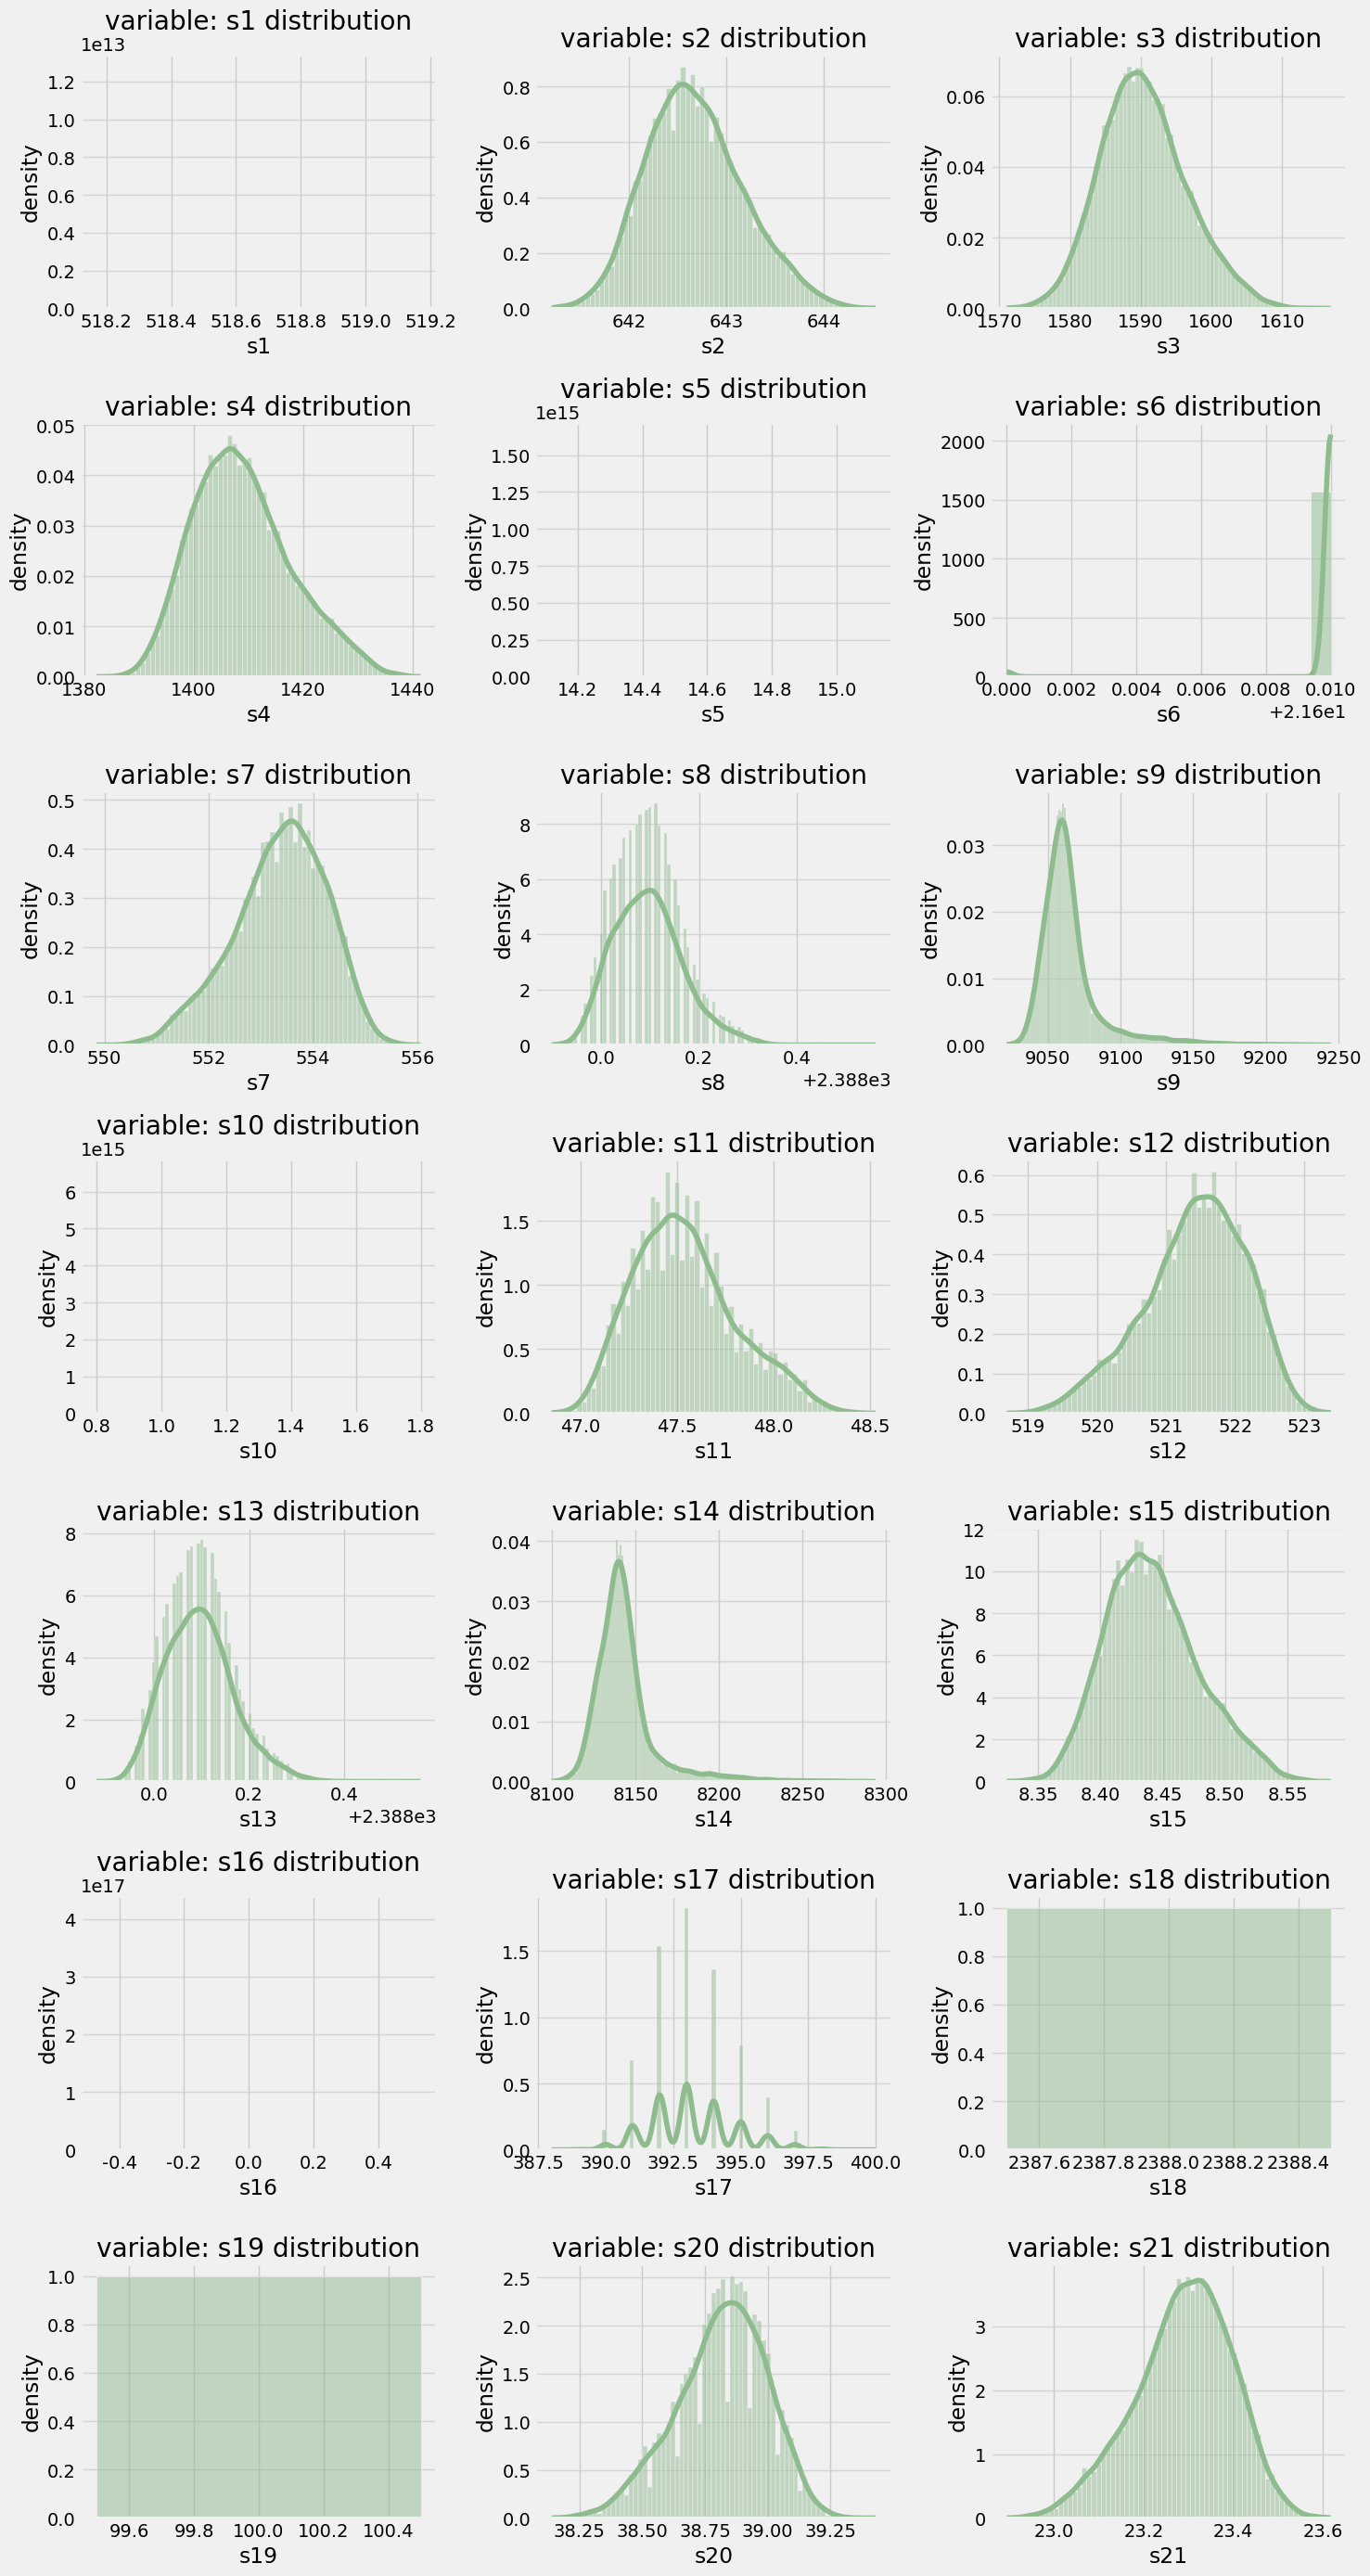

In [49]:
# 그래프 그리기
n_cols = 3  # 한 줄에 표시할 그래프 개수
n_rows = int(np.ceil(len(confounding_col) / n_cols)) # 필요한 행 개수

plt.figure(figsize=(n_cols * 5, n_rows * 4)) # 전체 figure 크기 설정

for i, var in enumerate(confounding_col):
    plt.subplot(n_rows, n_cols, i + 1) # 서브플롯 위치 지정
    sns.histplot(df[var], kde=True, stat='density', color='darkseagreen') # 색상 변경
    plt.title(f'variable: {var} distribution')
    plt.xlabel(var)
    plt.ylabel('density')
    plt.grid(axis='y', alpha=0.75)

plt.tight_layout() # 서브플롯 간 간격 자동 조정
plt.show()

# 5. 모델 찾기

In [50]:
from sklearn.model_selection import train_test_split
y = "target"
T = "trmt1"
X = confounding_col

train, test = train_test_split(df, test_size=0.3, random_state=42, stratify=df[T])

- T-러너

auuc_score : uplift_tree    0.814014
dtype: float64
qini_score : uplift_tree    0.66821
dtype: float64


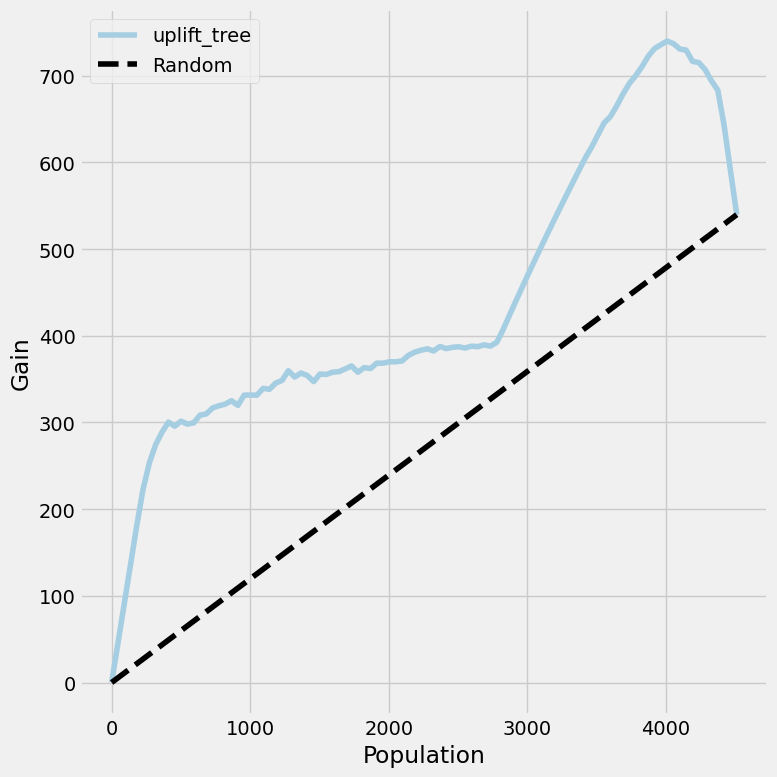

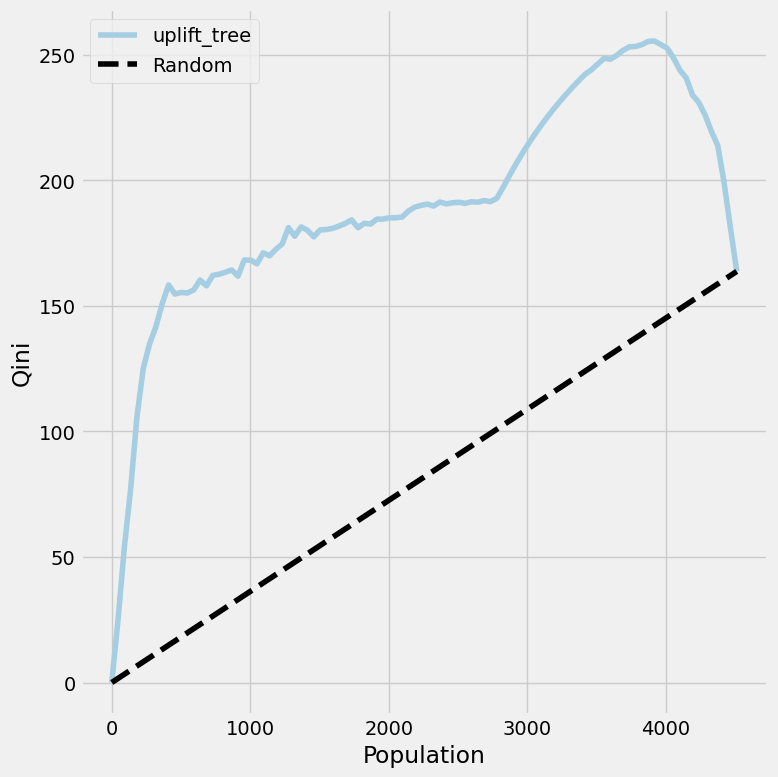

In [56]:
# 1. T-Classifier with LGBMClassifier
t_learner_xgb = BaseTClassifier(learner=XGBClassifier(random_state=24,n_estimators=50),control_name=0)

t_learner_xgb.fit(X=train[X], treatment=train[T], y=train[y])
ate_t_xgb = t_learner_xgb.estimate_ate(X=test[X], treatment=test[T], y=test[y])
ite_t_xgb = t_learner_xgb.predict(X=test[X], treatment=test[T])

result = pd.DataFrame(ite_t_xgb,
                      columns=['treatment'])
best_treatment = np.where((result < 0).all(axis=1),
                           'c',
                           result.idxmax(axis=1))

actual_is_best = np.where(test[T].replace([0,1],['c','treatment']) == best_treatment, 1, 0)
actual_is_control = np.where(test[T].replace([0,1],['c','treatment']) == 'c', 1, 0)
synthetic = (actual_is_best == 1) | (actual_is_control == 1)
synth = result[synthetic]

auuc_metrics = (synth.assign(is_treated = 1 - actual_is_control[synthetic],
                             target = test.loc[synthetic, 'target'].values.astype(int),
                             uplift_tree = synth.max(axis=1)))

auuc_xgb = auuc_score(auuc_metrics.drop(columns='treatment'), outcome_col='target', treatment_col='is_treated')
print(f'auuc_score : {auuc_xgb}')

plot_gain(auuc_metrics.drop(columns='treatment'), outcome_col='target', treatment_col='is_treated')

qini_xgb = qini_score(auuc_metrics.drop(columns='treatment'), outcome_col='target', treatment_col='is_treated')
print(f'qini_score : {qini_xgb}')
plot_qini(auuc_metrics.drop(columns='treatment'), outcome_col='target', treatment_col='is_treated')

- T-러너: 다른 기본 Learner

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

auuc_score : uplift_tree    30.682248
dtype: float64
qini_score : uplift_tree    35.263384
dtype: float64


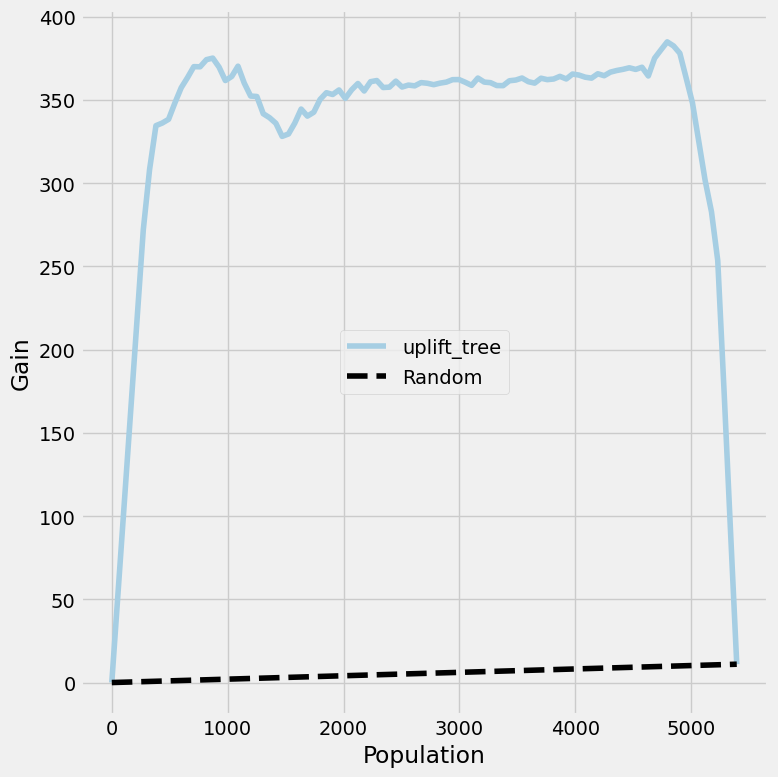

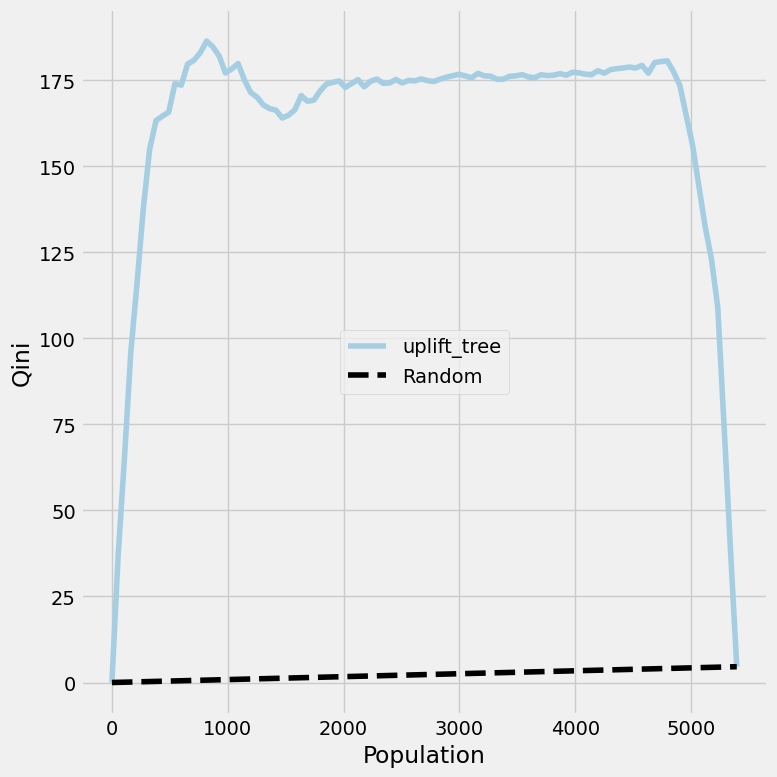

In [57]:
# 1. T-Classifier with LGBMClassifier
t_learner_lgbm = BaseTClassifier(learner=LGBMClassifier(random_state=24,verbose=-1),control_name=0)
t_learner_lgbm.fit(X=train[X], treatment=train[T], y=train[y])
ate_t_lgbm = t_learner_lgbm.estimate_ate(X=test[X], treatment=test[T], y=test[y])
ite_t_lgbm = t_learner_lgbm.predict(X=test[X], treatment=test[T])

result = pd.DataFrame(ite_t_lgbm,
                      columns=['treatment'])
best_treatment = np.where((result < 0).all(axis=1),
                           'c',
                           result.idxmax(axis=1))

actual_is_best = np.where(test[T].replace([0,1],['c','treatment']) == best_treatment, 1, 0)
actual_is_control = np.where(test[T].replace([0,1],['c','treatment']) == 'c', 1, 0)
synthetic = (actual_is_best == 1) | (actual_is_control == 1)
synth = result[synthetic]

auuc_metrics = (synth.assign(is_treated = 1 - actual_is_control[synthetic],
                             target = test.loc[synthetic, 'target'].values.astype(int),
                             uplift_tree = synth.max(axis=1)))

auuc_lgbm = auuc_score(auuc_metrics.drop(columns='treatment'), outcome_col='target', treatment_col='is_treated')
print(f'auuc_score : {auuc_lgbm}')

plot_gain(auuc_metrics.drop(columns='treatment'), outcome_col='target', treatment_col='is_treated')

qini_lgbm = qini_score(auuc_metrics.drop(columns='treatment'), outcome_col='target', treatment_col='is_treated')
print(f'qini_score : {qini_lgbm}')
plot_qini(auuc_metrics.drop(columns='treatment'), outcome_col='target', treatment_col='is_treated')

auuc_score : uplift_tree    0.798564
dtype: float64
qini_score : uplift_tree    0.776058
dtype: float64


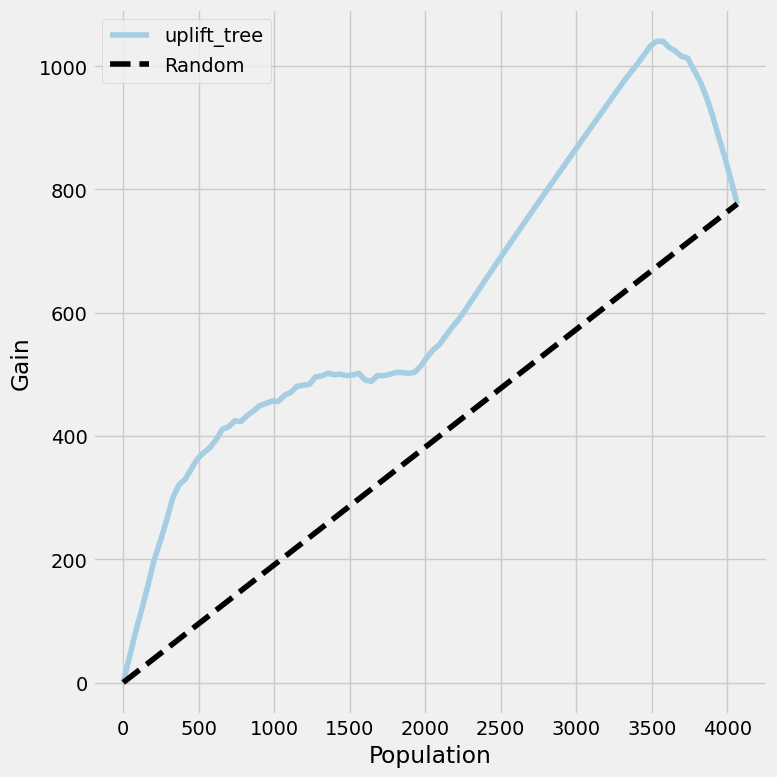

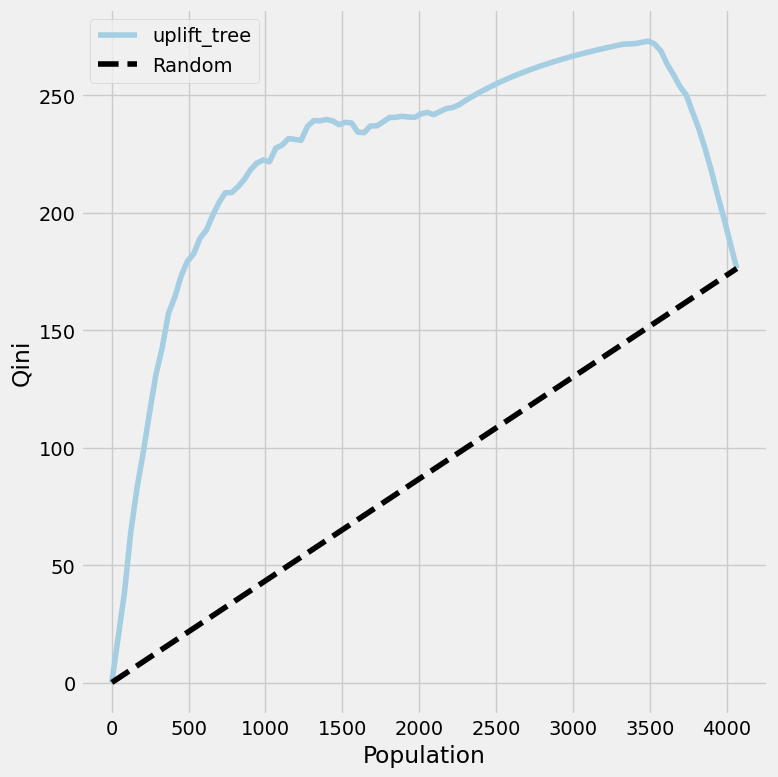

In [58]:
t_learner_rf = BaseTClassifier(learner=RandomForestClassifier(random_state=24, n_estimators=200, max_depth=5),control_name=0)
t_learner_rf.fit(X=train[X], treatment=train[T], y=train[y])
ate_t_rf = t_learner_rf.estimate_ate(X=test[X], treatment=test[T], y=test[y])
ite_t_rf = t_learner_rf.predict(X=test[X], treatment=test[T])

result = pd.DataFrame(ite_t_rf,
                      columns=['treatment'])
best_treatment = np.where((result < 0).all(axis=1),
                           'c',
                           result.idxmax(axis=1))

actual_is_best = np.where(test[T].replace([0,1],['c','treatment']) == best_treatment, 1, 0)
actual_is_control = np.where(test[T].replace([0,1],['c','treatment']) == 'c', 1, 0)
synthetic = (actual_is_best == 1) | (actual_is_control == 1)
synth = result[synthetic]

auuc_metrics = (synth.assign(is_treated = 1 - actual_is_control[synthetic],
                             target = test.loc[synthetic, 'target'].values.astype(int),
                             uplift_tree = synth.max(axis=1)))

auuc_rf = auuc_score(auuc_metrics.drop(columns='treatment'), outcome_col='target', treatment_col='is_treated')
print(f'auuc_score : {auuc_rf}')

plot_gain(auuc_metrics.drop(columns='treatment'), outcome_col='target', treatment_col='is_treated')

qini_rf = qini_score(auuc_metrics.drop(columns='treatment'), outcome_col='target', treatment_col='is_treated')
print(f'qini_score : {qini_rf}')
plot_qini(auuc_metrics.drop(columns='treatment'), outcome_col='target', treatment_col='is_treated')

auuc_score : uplift_tree    3074.738345
dtype: float64
qini_score : uplift_tree    3327.023087
dtype: float64


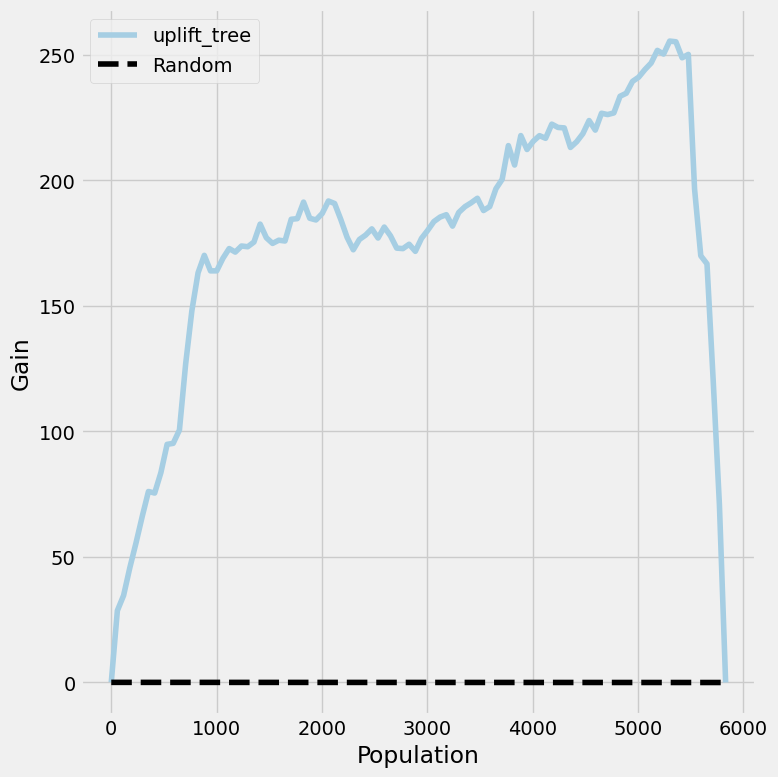

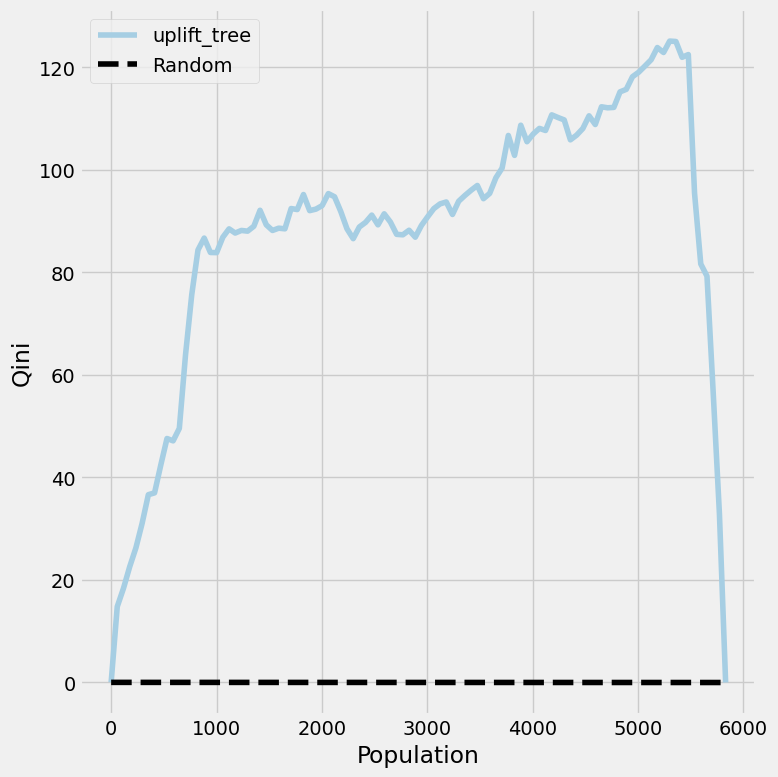

In [59]:
# T-Classifier with KNeighborsClassifier
t_learner_knn = BaseTClassifier(learner=KNeighborsClassifier(n_neighbors=10))
t_learner_knn.fit(X=train[X], treatment=train[T], y=train[y])
ate_t_knn = t_learner_knn.estimate_ate(X=test[X], treatment=test[T], y=test[y])
ite_t_knn = t_learner_knn.predict(X=test[X], treatment=test[T])

result = pd.DataFrame(ite_t_knn,
                      columns=['treatment'])
best_treatment = np.where((result < 0).all(axis=1),
                           'c',
                           result.idxmax(axis=1))

actual_is_best = np.where(test[T].replace([0,1],['c','treatment']) == best_treatment, 1, 0)
actual_is_control = np.where(test[T].replace([0,1],['c','treatment']) == 'c', 1, 0)
synthetic = (actual_is_best == 1) | (actual_is_control == 1)
synth = result[synthetic]

auuc_metrics = (synth.assign(is_treated = 1 - actual_is_control[synthetic],
                             target = test.loc[synthetic, 'target'].values.astype(int),
                             uplift_tree = synth.max(axis=1)))

auuc_knn = auuc_score(auuc_metrics.drop(columns='treatment'), outcome_col='target', treatment_col='is_treated')
print(f'auuc_score : {auuc_knn}')

plot_gain(auuc_metrics.drop(columns='treatment'), outcome_col='target', treatment_col='is_treated')

qini_knn = qini_score(auuc_metrics.drop(columns='treatment'), outcome_col='target', treatment_col='is_treated')
print(f'qini_score : {qini_knn}')
plot_qini(auuc_metrics.drop(columns='treatment'), outcome_col='target', treatment_col='is_treated')

auuc_score : uplift_tree    0.057324
dtype: float64
qini_score : uplift_tree    0.567742
dtype: float64


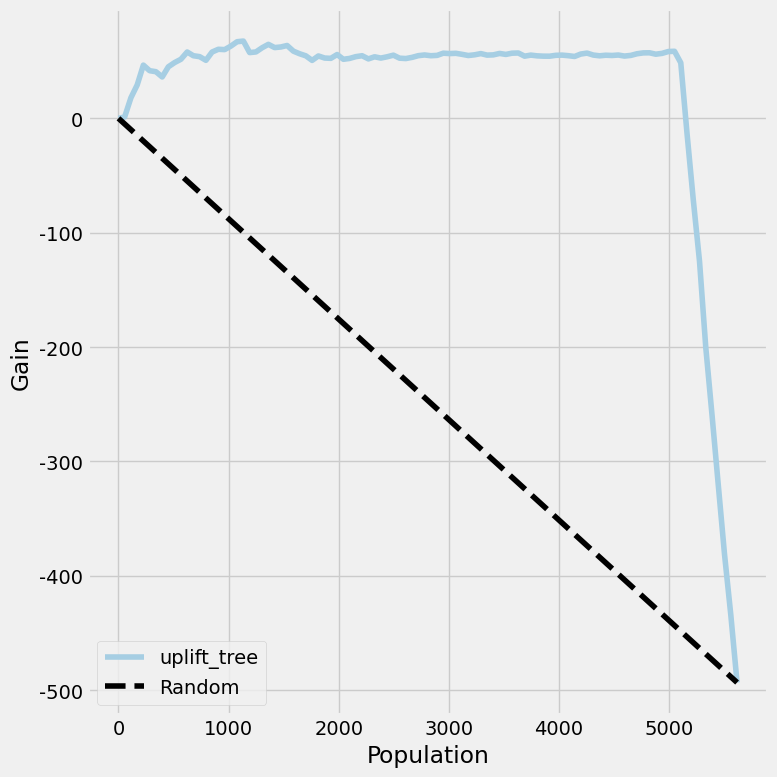

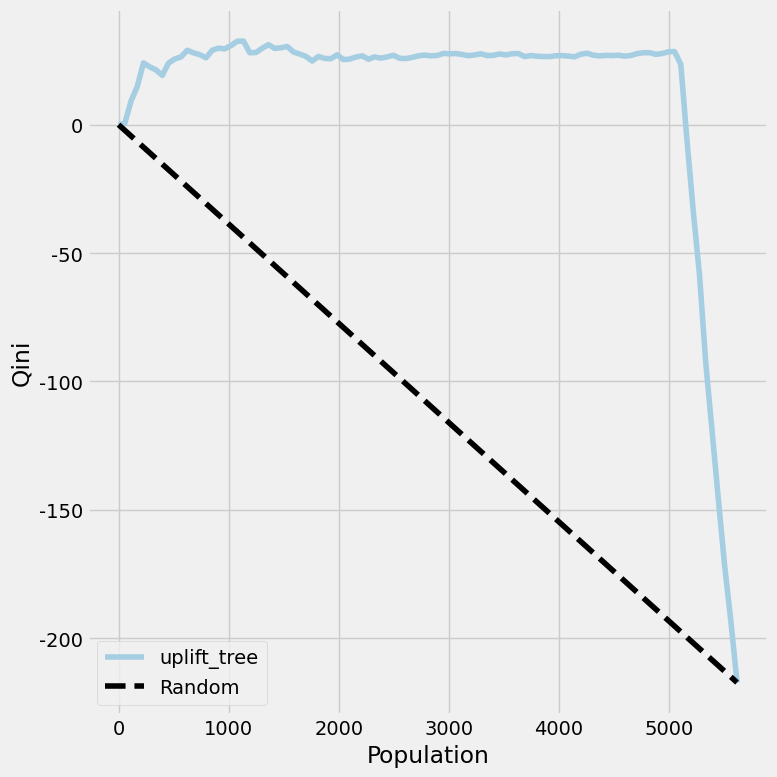

In [60]:
# T-Classifier with LogisticRegression
t_learner_lr = BaseTClassifier(learner=LogisticRegression(random_state=24, max_iter=1000))
t_learner_lr.fit(X=train[X], treatment=train[T], y=train[y])
ate_t_lr = t_learner_lr.estimate_ate(X=test[X], treatment=test[T], y=test[y])
ite_t_lr = t_learner_lr.predict(X=test[X], treatment=test[y])

result = pd.DataFrame(ite_t_lr,
                      columns=['treatment'])
best_treatment = np.where((result < 0).all(axis=1),
                           'c',
                           result.idxmax(axis=1))

actual_is_best = np.where(test[T].replace([0,1],['c','treatment']) == best_treatment, 1, 0)
actual_is_control = np.where(test[T].replace([0,1],['c','treatment']) == 'c', 1, 0)
synthetic = (actual_is_best == 1) | (actual_is_control == 1)
synth = result[synthetic]

auuc_metrics = (synth.assign(is_treated = 1 - actual_is_control[synthetic],
                             target = test.loc[synthetic, 'target'].values.astype(int),
                             uplift_tree = synth.max(axis=1)))

auuc_lr = auuc_score(auuc_metrics.drop(columns='treatment'), outcome_col='target', treatment_col='is_treated')
print(f'auuc_score : {auuc_lr}')

plot_gain(auuc_metrics.drop(columns='treatment'), outcome_col='target', treatment_col='is_treated')

qini_lr = qini_score(auuc_metrics.drop(columns='treatment'), outcome_col='target', treatment_col='is_treated')
print(f'qini_score : {qini_lr}')
plot_qini(auuc_metrics.drop(columns='treatment'), outcome_col='target', treatment_col='is_treated')

In [61]:
# 결과 요약

print("\n=== 결과 요약 ===")
print(f"T-Classifier (XGBClassifier) ATE: {ate_t_xgb[0].item():.4f} (95% CI: [{ate_t_xgb[1].item():.4f}, {ate_t_xgb[2].item():.4f}])")
print(f"T-Classifier (LGBMClassifier) ATE: {ate_t_lgbm[0].item():.4f} (95% CI: [{ate_t_lgbm[1].item():.4f}, {ate_t_lgbm[2].item():.4f}])")
print(f"T-Classifier (RandomForest) ATE: {ate_t_rf[0].item():.4f} (95% CI: [{ate_t_rf[1].item():.4f}, {ate_t_rf[2].item():.4f}])")
print(f"T-Classifier (KNeighborsClassifier) ATE: {ate_t_knn[0].item():.4f} (95% CI: [{ate_t_knn[1].item():.4f}, {ate_t_knn[2].item():.4f}])")
print(f"T-Classifier (LogisticRegression) ATE: {ate_t_lr[0].item():.4f} (95% CI: [{ate_t_lr[1].item():.4f}, {ate_t_lr[2].item():.4f}])")


=== 결과 요약 ===
T-Classifier (XGBClassifier) ATE: -0.0009 (95% CI: [-0.0051, 0.0034])
T-Classifier (LGBMClassifier) ATE: -0.0049 (95% CI: [-0.0095, -0.0003])
T-Classifier (RandomForest) ATE: 0.0007 (95% CI: [-0.0064, 0.0078])
T-Classifier (KNeighborsClassifier) ATE: 0.0011 (95% CI: [-0.0085, 0.0108])
T-Classifier (LogisticRegression) ATE: 0.0012 (95% CI: [-0.0075, 0.0099])


In [62]:
print("\n=== AUUC 결과 요약 ===")
print(f"T-AUUC (XGBClassifier) : {list(auuc_xgb)}")
print(f"T-AUUC (LGBMClassifier) : {list(auuc_lgbm)}")
print(f"T-AUUC (RandomForest) : {list(auuc_rf)} ")
print(f"T-AUUC (KNeighborsClassifier) : {list(auuc_knn)}")
print(f"T-AUUC (LogisticRegression) : {list(auuc_lr)}")


=== AUUC 결과 요약 ===
T-AUUC (XGBClassifier) : [0.8140137079551762]
T-AUUC (LGBMClassifier) : [30.68224774931946]
T-AUUC (RandomForest) : [0.7985640065391402] 
T-AUUC (KNeighborsClassifier) : [3074.7383451107244]
T-AUUC (LogisticRegression) : [0.05732390001385487]


In [66]:
print("\n=== QINI 결과 요약 ===")
print(f"T-QINI (XGBClassifier) : {list(qini_xgb)}")
print(f"T-QINI (LGBMClassifier) : {list(qini_lgbm)}")
print(f"T-QINI (RandomForest) : {list(qini_rf)} ")
print(f"T-QINI (KNeighborsClassifier) : {list(qini_knn)}")
print(f"T-QINI (LogisticRegression) : {list(qini_lr)}")


=== QINI 결과 요약 ===
T-QINI (XGBClassifier) : [0.668210183380903]
T-QINI (LGBMClassifier) : [35.26338393250466]
T-QINI (RandomForest) : [0.7760577573852089] 
T-QINI (KNeighborsClassifier) : [3327.023086920764]
T-QINI (LogisticRegression) : [0.567741540567098]
